<a href="https://colab.research.google.com/github/Latamila/ConsumoEnergiaSerieTemporal/blob/main/ConsumoDeEnergia2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.10.12


In [ ]:
# Imports para manipulação de dados
import pandas as pd

# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns

# Imports para análise e modelagem de séries temporais
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

In [ ]:
 !pip install -q -U watermark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.4 MB/s eta 0:00:00


In [ ]:
# Formatando as saídas dos gráficos
plt.style.use('fivethirtyeight')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'

In [ ]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

pandas     : 1.5.3
statsmodels: 0.14.0
seaborn    : 0.12.2
matplotlib : 3.7.1



In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [ ]:
# Carrega os dados
dados = pd.read_csv('dataset.csv', header = None)

In [ ]:
# Ajustando o nome de cada coluna
dados.columns = ['mes', 'consumo_energia']

Vamos converter a data do tipo object (string) para o tipo apropriado, datetime, pois assim podemos usar métodos e atributos específicos de datas.

In [ ]:
# Convertendo a coluna data de object para datetime
dados['mes'] = pd.to_datetime(dados['mes'], format = '%Y-%m')

In [ ]:
# Vamos transformar a coluna de data no índice do conjunto de dados. Isso vai facilitar nosso trabalho mais a frente.
dados_serie = dados.set_index('mes')

In [ ]:
dados_serie.head()


,consumo_energia
mes,
2004-01-01,112
2004-02-01,118
2004-03-01,132
2004-04-01,129
2004-05-01,121


Agora sim podemos chamar esse conjunto de dados de série temporal. Vamos visualizar o índice:

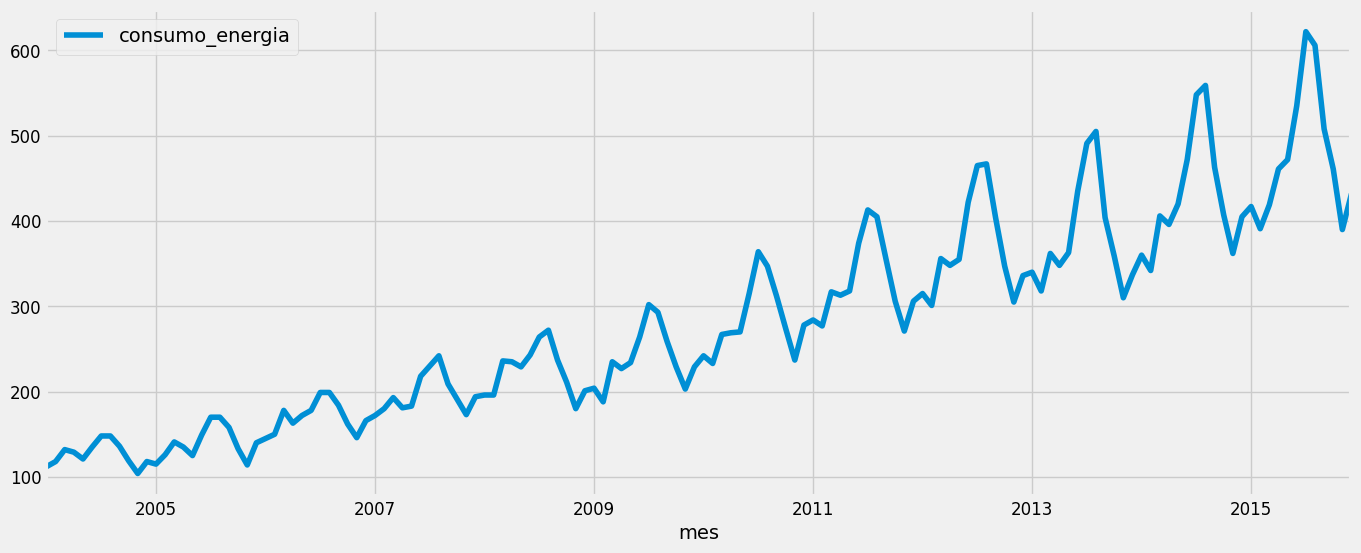

In [ ]:
# Plot da série temporal
dados_serie.plot(figsize = (15, 6))
plt.show()

O gráfico acima mostra 2 componentes da série: Sazonalidade e Tendência.

- Sazonalidade - o fenômeno se repete em períodos fixos.

- Tendência - ao longo do tempo, a série segue uma tendência de crescimento.

Como verificamos se a nossa série é estacionária? Precisamos checar algumas suposições e regras.

Antes de iniciar qualquer modelagem preditiva em séries temporais é
##necessário verificar se essas propriedades estatísticas são constantes na série temporal:

- **Estacionariedade**: a série temporal
#**deve**
 ser estacionária, ou seja, suas características estatísticas, como média e variância, não mudam ao longo do tempo.


- **Não-autocorrelação**: as observações da série temporal
#não devem ser fortemente correlacionadas
com observações anteriores.


- **Normalidade**: é frequentemente pressuposto que as observações da série temporal
#são distribuídas normalmente (seguem uma distribuição normal).

#Plot das Rollings Statistics(Estatisticas Moveis)

Primeiro, vamos checar se as estatisticas moveis são ou não constantes ao longo da serie temporal.

In [ ]:
type(dados)

pandas.core.frame.DataFrame

In [ ]:
#determinando estatisticas moveis
rolmean = dados['consumo_energia'].rolling(window = 12).mean()
rolstd = dados['consumo_energia'].rolling(window = 12).std()


In [ ]:
x= dados['mes'].values
y = dados['consumo_energia'].values
#fprepara os dados para o plot

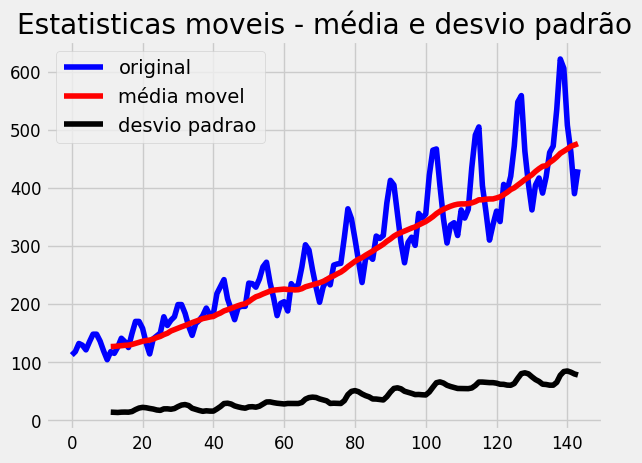

In [ ]:
#plot das estatisticas moveis
orig = plt.plot(y,color='blue', label='original')
mean = plt.plot(rolmean, color= 'red', label = 'média movel')
std = plt.plot(rolstd, color= 'black', label = 'desvio padrao')
plt.legend(loc = 'best')
plt.title('Estatisticas moveis - média e desvio padrão')
plt.show()

analise:
* observamos que a média movel e o desvio padrao não são constantes em relação ao tempo (tendencia crescente).

* a serie não é, portanto, estacionária.

#PLOT DA FUNÇAÕ DE CORRELAÇÃO (ACF) E FUNÇÃO DE AUTOCORRELAÇÃO PARCIAL (PACF)

Vamos criar os graficos da ACF E PACF.



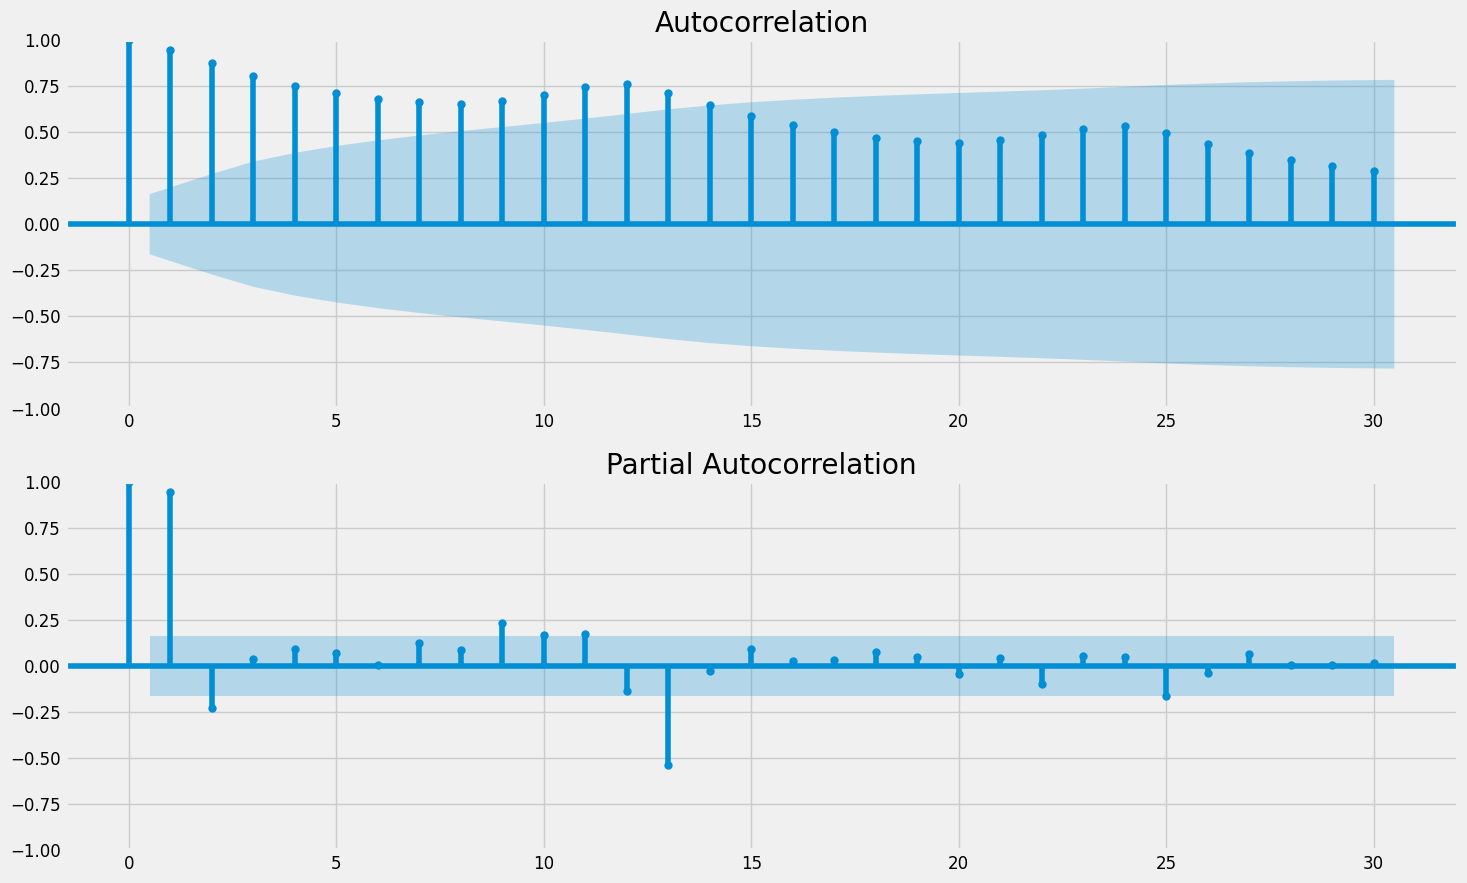

In [ ]:
# Plots
plt.rcParams.update({'figure.figsize': (16,10)})

# Plot do gráfico ACF
# https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html
plt.subplot(211)
plot_acf(dados_serie.consumo_energia, ax = plt.gca(), lags = 30)

# Plot do gráfico PACF
# https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html
plt.subplot(212)
plot_pacf(dados_serie.consumo_energia, ax = plt.gca(), lags = 30, method = 'ywm')
plt.show()

Interpretação dos Gráficos:
    
No gráfico,
#o eixo vertical
indica a autocorrelação e o horizontal a defasagem.

#A área sombreada em azul indica onde é significativamente diferente de zero.
 Como é possível ver na imagem, temos diversos valores ACF (barras verticais) acima do limite da área sombreada em azul. Nesses casos, a autocorrelação é
 #diferente de zero, indicando que a série não é aleatória –
 conforme o esperado.

Algumas barras verticais estão dentro do limite da área sombreada em azul, Ou seja, a autocorrelação entre a série com alguns de seus lags é igual a zero, indicando que não há correlação.

Em termos simples:
#a área sombreada em azul aponta a significância.

Se ultrapassada é porque tem correlação.

Cada barra no gráfico ACF representa o nível de correlação entre a série e seus atrasos em ordem cronológica. A área sombreada em azul indica se o nível de correlação entre a série e cada atraso é significativo ou não.

Testando
#a hipótese nula de que a correlação do atraso com a série é igual a zero,

 podemos rejeitá-la sempre que o nível de correlação estiver acima ou abaixo da área sombreada em azul com um nível de significância de 5%.

Caso contrário, sempre que a correlação estiver dentro da área sombreada em azul,  deixamos de rejeitar a hipótese nula e, portanto, podemos ignorar esses atrasos (ou assumir que não há correlação significativa entre eles e a série).

O PACF é apenas uma visualização parcial do ACF.

Análise:
    
-
#Se a série temporal for estacionária, os gráficos do ACF / PACF mostrarão uma "queda rápida na correlação" após um pequeno atraso entre os pontos.
Não é o caso em nossos gráficos. A queda lenta (redução do tamanho das barras) indica que essa série não é estacionária.


- Os dados da nossa série não são estacionários, pois um número alto de observações anteriores está correlacionado com valores futuros.


- Intervalos de confiança são desenhados na área azul clara. Por padrão, isso é definido como um intervalo de confiança de 95%, sugerindo que os valores de correlação fora desta área provavelmente são uma correlação e não um acaso estatístico.


- Teremos que transformar essa série em estacionária antes de criar um modelo preditivo. Veremos isso mais adiante.

### Teste Dickey-Fuller Aumentado

- A intuição por trás do teste é que,
#se a série for integrada, o nível de atraso da série y (t-1) não fornecerá informações relevantes na previsão da mudança em y (t).


- Hipótese nula (H0): A série temporal não é estacionária.


- Hipótese alternativa (H1) - Rejeitar a hipótese nula (ou seja, um valor-p abaixo de 0.05) indicará estacionaridade.

In [ ]:
# Teste Dickey-Fuller

# Print
print('\nResultado do Teste Dickey-Fuller:\n')

# Teste
dfteste = adfuller(dados_serie.consumo_energia, autolag = 'AIC')

# Formatando a saída
dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste',
                                           'Valor-p',
                                           'Número de Lags Consideradas',
                                           'Número de Observações Usadas'])

# Loop por cada item da saída do teste
for key,value in dfteste[4].items():
    dfsaida['Valor Crítico (%s)'%key] = value

# Print
print (dfsaida)


Resultado do Teste Dickey-Fuller:

Estatística do Teste              0.817848
Valor-p                           0.991919
Número de Lags Consideradas      13.000000
Número de Observações Usadas    130.000000
Valor Crítico (1%)               -3.481682
Valor Crítico (5%)               -2.884042
Valor Crítico (10%)              -2.578770
dtype: float64


Análise:

- O Valor-p é maior que 0.05. Não temos evidências para rejeitar a hipótese nula de que a série não é estacionária.

## Automatizando  o Teste de Estacionariedade

E aqui um presente para você. Uma função que executa o teste de estacionaridade e pode ser aplicada a qualquer série para testar se ela é ou não estacionária.

**Se a série não for estacionária, teremos que aplicar transformações antes da modelagem. Em nosso exemplo, a série não é estacionária e vamos transformá-la em estacionária mais adiante.**

Isso vale para qualquer série temporal.

In [ ]:
# Função
def testa_estacionaridade(serie):

    # Calcula estatísticas móveis
    rolmean = serie.rolling(window = 12).mean()
    rolstd = serie.rolling(window = 12).std()

    # Plot das estatísticas móveis
    orig = plt.plot(serie, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Média Móvel')
    std = plt.plot(rolstd, color = 'black', label = 'Desvio Padrão')

    # Plot
    plt.legend(loc = 'best')
    plt.title('Estatísticas Móveis - Média e Desvio Padrão')
    plt.show()

    # Teste Dickey-Fuller:
    # Print
    print('\nResultado do Teste Dickey-Fuller:\n')

    # Teste
    dfteste = adfuller(dados_serie.consumo_energia, autolag = 'AIC')

    # Formatando a saída
    dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste',
                                               'Valor-p',
                                               'Número de Lags Consideradas',
                                               'Número de Observações Usadas'])

    # Loop por cada item da saída do teste
    for key, value in dfteste[4].items():
        dfsaida['Valor Crítico (%s)'%key] = value

    # Print
    print (dfsaida)

    # Testa o valor-p
    print ('\nConclusão:')
    if dfsaida[1] > 0.05:
        print('\nO valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente não é estacionária.')
    else:
        print('\nO valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente é estacionária.')

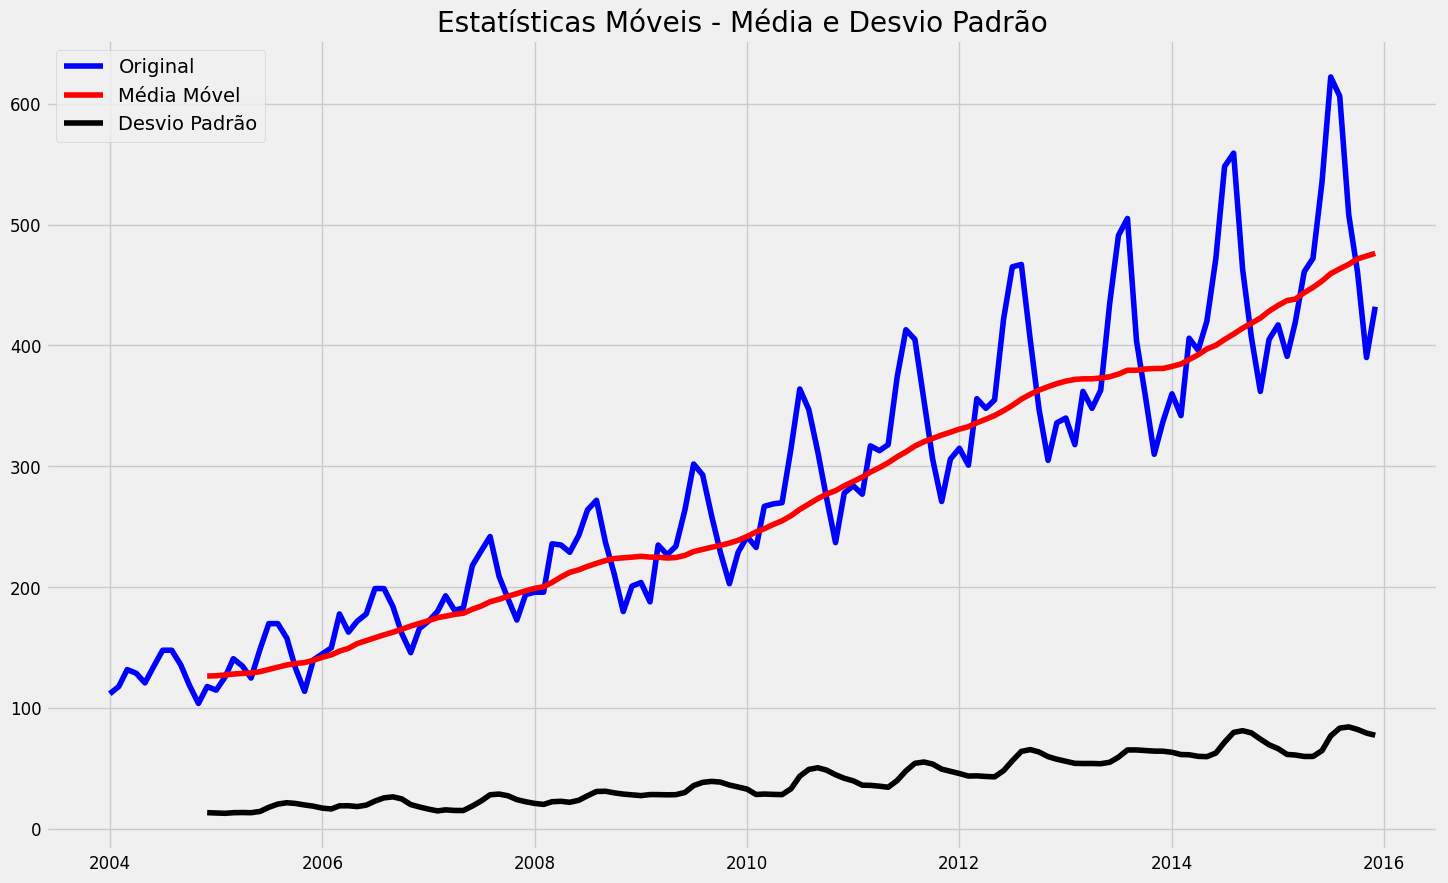


Resultado do Teste Dickey-Fuller:

Estatística do Teste              0.817848
Valor-p                           0.991919
Número de Lags Consideradas      13.000000
Número de Observações Usadas    130.000000
Valor Crítico (1%)               -3.481682
Valor Crítico (5%)               -2.884042
Valor Crítico (10%)              -2.578770
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [ ]:
#executando nossa função
testa_estacionaridade(dados_serie)

FIM DA PARTE 2